In [2]:
from bertopic import BERTopic
import pandas as pd
import nltk
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import numpy as np
import datamapplot
from gensim.models import CoherenceModel
from gensim.corpora.dictionary import Dictionary
from hdbscan import HDBSCAN
from umap import UMAP
import openai
import tiktoken
import seaborn as sns
from bertopic.representation import OpenAI
from bertopic.representation import KeyBERTInspired
from sentence_transformers import SentenceTransformer
from octis.evaluation_metrics.diversity_metrics import TopicDiversity
from octis.evaluation_metrics.coherence_metrics import Coherence
from sklearn.manifold import TSNE

In [20]:
df_themes= pd.read_csv('4THAPRILFINALSMALLDF.csv')
df=pd.read_csv('ThemeAnalysedDataset.csv')
embedder = SentenceTransformer("all-MiniLM-L6-v2")
embeddings = embedder.encode(df_themes['cleaned_description'].tolist())

In [21]:
df

,Book-Title,Book-Author,User-ID,ISBN,Book-Rating,Year-Of-Publication,Publisher,Location,Age,category,description,num_words,num_chars,cleaned_description,finegrained_topic_no,finegrained_Theme,merged_topic_no,merged_Theme
0,The Terminal Man,Michael Crichton,276964,0345354621,10,1988,Ballantine Books,"villa ridge, missouri, usa",34.0,Fiction,Hearry Benson suffers from violent seizures. W...,54,335,hearry benson suffers violent seizure becomes ...,23.0,Psychological Thriller,2.0,Action & Psychological Thrillers
1,The Chamber,John Grisham,276964,0440220602,9,1995,Dell Publishing Company,"villa ridge, missouri, usa",34.0,American fiction,While the executioners prepare the gas chamber...,26,155,executioner prepare gas chamber protester gath...,1.0,Crime Thrillers and Detective Drama,1.0,Crime & Detective Fiction
2,The Girl Who Loved Tom Gordon : A Novel,Stephen King,276964,0684867621,8,1999,Scribner,"villa ridge, missouri, usa",34.0,Fiction,A story of a nine year old who wanders off in ...,19,90,story nine year old wanders wilderness area he...,3.0,Spiritual & Mindfulness,6.0,Spiritual & Mindfulness
3,In the Dark,Richard Laymon,276964,0843949163,8,2001,Leisure Books,"villa ridge, missouri, usa",34.0,California,A tale of suspense follows young librarian Jan...,44,250,tale suspense follows young librarian jane ker...,2.0,Gothic Vampire Fiction,3.0,Fantasy Literature
4,Tailchaser's Song,Tad Williams,276964,0886773741,7,1994,Daw Books,"villa ridge, missouri, usa",34.0,Fiction,"Fritti Tailchaser, a ginger tomcat of courage ...",31,199,fritti tailchaser ginger tomcat courage curios...,9.0,Cozy Mysteries,2.0,Action & Psychological Thrillers
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74595,Deception on His Mind,ELIZABETH GEORGE,276688,0553575090,7,1998,Bantam,"fort lee, new jersey, usa",NaN,Fiction,When a member of the small but growing Asian c...,59,387,member small growing asian community found dea...,1.0,Crime Thrillers and Detective Drama,1.0,Crime & Detective Fiction
74596,Stalker: A Novel (Peter Decker &amp; Rina Laza...,Faye Kellerman,276688,0688156134,8,2000,William Morrow &amp; Company,"fort lee, new jersey, usa",NaN,Fiction,A first-year rookie with the LAPD's Hollywood ...,254,1542,rookie lapd hollywood division cynthia decker ...,1.0,Crime Thrillers and Detective Drama,1.0,Crime & Detective Fiction
74597,"Money, Money, Money : A Novel of the 87th Prec...",Ed McBain,276688,0743202694,10,2001,Simon &amp; Schuster,"fort lee, new jersey, usa",NaN,Fiction,It's Christmas in the city. A retired Gulf War...,33,173,christmas city retired gulf war pilot couple a...,14.0,Holiday Classics,9.0,Holiday Stories
74598,Wiener Dog Art,Gary Larson,276688,0836218655,10,1990,Andrews McMeel Publishing,"fort lee, new jersey, usa",NaN,Humor,"1990 FarWorks, Inc. All Rights Reserved. The F...",19,122,1990 farworks right reserved far side larson s...,15.0,Romantic Relationships,0.0,Romance & Relationships


In [15]:
# 3. Reduce dimensions
# reducer = UMAP(n_neighbors=50, min_dist=0.1, metric='cosine', random_state=42)
# embeddings_2d = reducer.fit_transform(embeddings)

# 4. Create enriched hover text
hover_texts = [
    f"{title}: "
    f"{theme}"
    for title, theme in zip(
        df_themes['Book-Title'],
        df_themes['finegrained_Topic']     
    )
]

# 5. Generate interactive plot with centered labels
interactive_plot = datamapplot.create_interactive_plot(
    embeddings_2d,
    df_themes['finegrained_Topic'].values,
    title="Book Themes",
    # sub_title="Click on points to explore books by theme",
    hover_text=hover_texts,
    width=1400,
    height=900,
    
    font_family="Cinzel",
    enable_search=True,
    darkmode=True,  # Light theme for better readability
)



<InteractiveFigure width=1400 height=900>
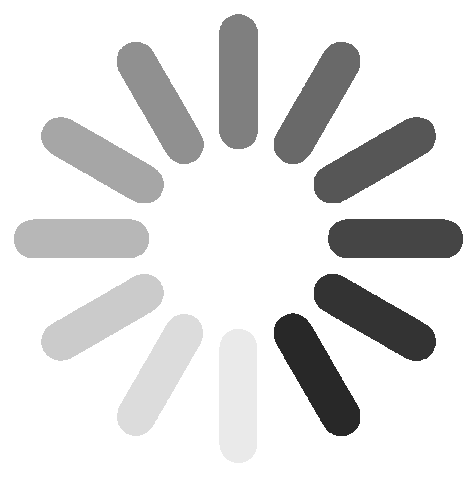

In [16]:
interactive_plot

In [26]:
interactive_plot.save("book_themes_plot.html")




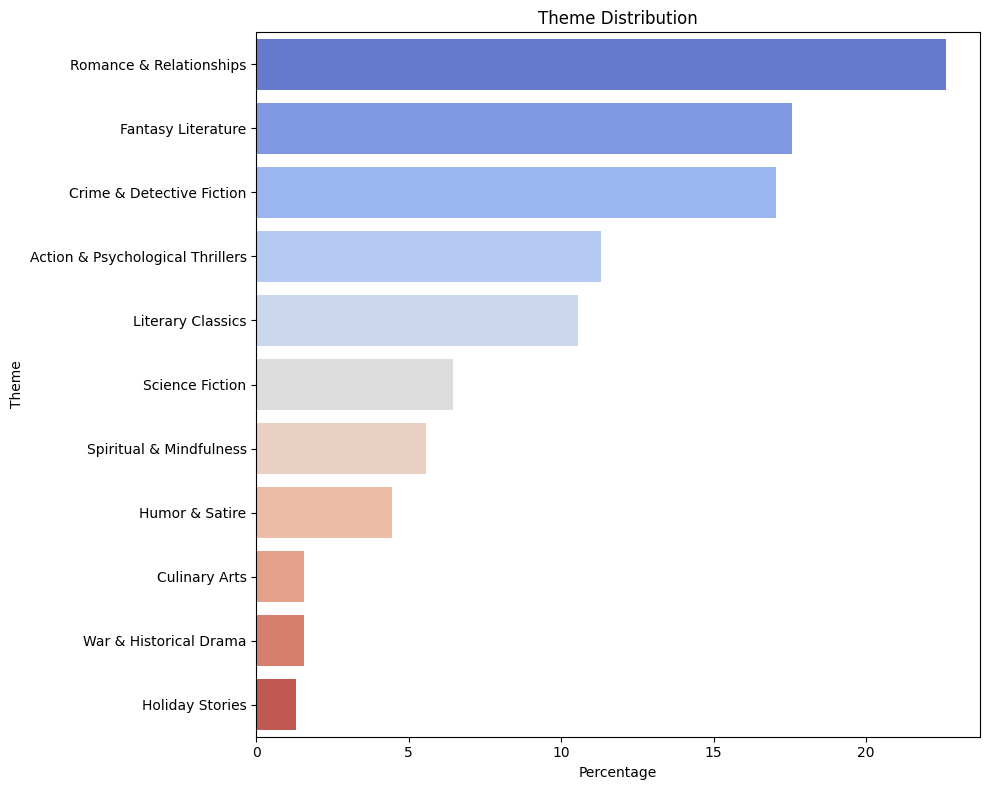

merged_Theme
Romance & Relationships             22.608854
Fantasy Literature                  17.562398
Crime & Detective Fiction           17.052286
Action & Psychological Thrillers    11.295318
Literary Classics                   10.548369
Science Fiction                      6.467480
Spiritual & Mindfulness              5.574786
Humor & Satire                       4.463472
Culinary Arts                        1.566770
War & Historical Drama               1.566770
Holiday Stories                      1.293496
Name: count, dtype: float64


In [33]:
# Calculate theme percentages
theme_counts = df_themes['merged_Theme'].value_counts()
theme_percentages = (theme_counts / len(df_themes)) * 100

# Plot theme distribution
# plt.figure(figsize=(12, 6))
# theme_percentages.plot(kind='bar', color='skyblue')
# plt.title('Percentage Distribution of Themes')
# plt.xlabel('Theme_broad')
# plt.ylabel('Percentage (%)')
# plt.xticks(rotation=90)
# plt.show()

plt.figure(figsize=(10, 8))
sns.barplot(
    x=theme_percentages.values,
    y=theme_percentages.index,
    palette="coolwarm"
)
plt.title("Theme Distribution")
plt.xlabel("Percentage")
plt.ylabel("Theme")
plt.tight_layout()
plt.show()
print(theme_percentages)

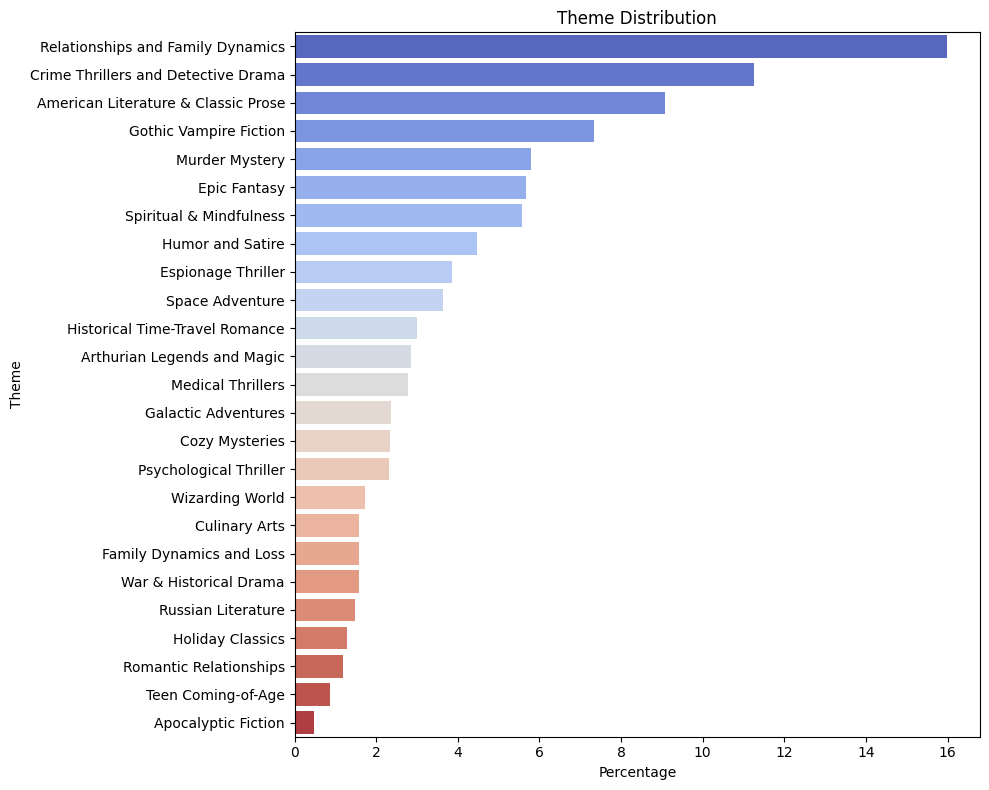

finegrained_Topic
Relationships and Family Dynamics      15.995628
Crime Thrillers and Detective Drama    11.258881
American Literature & Classic Prose     9.072691
Gothic Vampire Fiction                  7.323738
Murder Mystery                          5.793405
Epic Fantasy                            5.665877
Spiritual & Mindfulness                 5.574786
Humor and Satire                        4.463472
Espionage Thriller                      3.862270
Space Adventure                         3.643651
Historical Time-Travel Romance          2.987794
Arthurian Legends and Magic             2.842048
Medical Thrillers                       2.787393
Galactic Adventures                     2.350155
Cozy Mysteries                          2.331937
Psychological Thriller                  2.313718
Wizarding World                         1.730734
Culinary Arts                           1.566770
Family Dynamics and Loss                1.566770
War & Historical Drama                  1.566770
Ru

In [34]:

# Calculate theme percentages
theme_counts = df_themes['finegrained_Topic'].value_counts()
theme_percentages = (theme_counts / len(df_themes)) * 100

# Plot theme distribution
# plt.figure(figsize=(12, 6))
# theme_percentages.plot(kind='bar', color='skyblue')
# plt.title('Percentage Distribution of Themes')
# plt.xlabel('Theme')
# plt.ylabel('Percentage (%)')
# plt.xticks(rotation=90)
# plt.show()

plt.figure(figsize=(10, 8))
sns.barplot(
    x=theme_percentages.values,
    y=theme_percentages.index,
    palette="coolwarm"
)
plt.title("Theme Distribution")
plt.xlabel("Percentage")
plt.ylabel("Theme")
plt.tight_layout()
plt.show()

# Print percentages
print(theme_percentages)